## Temperature Forecast Project using ML

### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

**We have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.**

**Please note that there are two target variables here:**

* Next_Tmax: Next day maximum temperature
* Next_Tmin: Next day minimum temperature

### Dataset Link-
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

### Importing Necessary Libraries

In [44]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### Loading DataSet

In [45]:
df = pd.read_csv("temparature.csv")

In [46]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8    

In [47]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [48]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

In [49]:
df.sample(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5688     14.0  10-08-2016          33.2          25.8    43.967815   
1211     12.0  17-08-2013          31.6          25.4    56.772266   
1719     20.0  06-07-2014          29.3          22.6    36.003876   
7018     19.0  01-08-2017          33.2          23.2    56.463505   
2104      5.0  22-07-2014          29.2          24.6    54.852238   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5688    74.628616         35.912965         27.846284  6.117093   17.859835   
1211    92.302170         31.172813         26.117746  9.681986   44.642084   
1719    84.217941         31.130372         20.895589  6.334122   91.579865   
7018    81.430450         32.633721         26.999093  6.361774   53.278529   
2104    95.089554         29.131581         24.232014  9.024606  144.981935   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5688   0.127243   0.208388   0.010945   0.003229    0.000000    0.000000   
1211   0.242477   0.546554   0.255945   0.544327    0.000000    0.000000   
1719   0.320888   0.083397   0.001846   0.017629    0.000000    0.000000   
7018   0.279803   0.236782   0.309768   0.302276    0.000000    0.000000   
2104   0.907390   0.647676   0.156961   0.315027    5.178858    0.771756   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
5688    0.000000    0.000000  37.4967  126.927   30.9680  0.6180   
1211    0.009572    0.693669  37.5507  126.988  132.1180  0.5931   
1719    0.000256    0.000000  37.6181  127.004  146.5540  4.7296   
7018    0.000000    0.000000  37.5776  126.938   75.0924  1.7678   
2104    0.000000    0.000000  37.5507  127.135   35.0380  0.5055   

      Solar radiation  Next_Tmax  Next_Tmin  
5688      5116.991699       35.8       26.1  
1211      4986.005371       33.2       25.1  
1719      5892.493652       33.9       20.4  
7018      5431.715332       32.8       25.6  
2104      5603.330078       25.6       21.1

In the above cell we can see the first 5 and last 5 rows of our dataset. We see that in our dataset there are a total of 7752 rows and 25 columns present. We see that right now all the information shown above is in numerical format and has no text data but we will need to investigate on it further. Also the problem statement says that we are suppose to predict not 1 but 2 label columns namely "Next_Tmax" and "Next_Tmin". These target labels contain all continous data values in them so it makes this to be a Regression problem!

# Exploratory Data Analysis (EDA)

In [50]:
pd.set_option('display.max_columns', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [51]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [52]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [53]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping duplicates.
We have 7752 Rows and 25 Columns after dropping duplicates.


With the drop_duplicates option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset.

In [54]:
 # checking duplicate values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 1248 Nulls present in the dataset


In [55]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

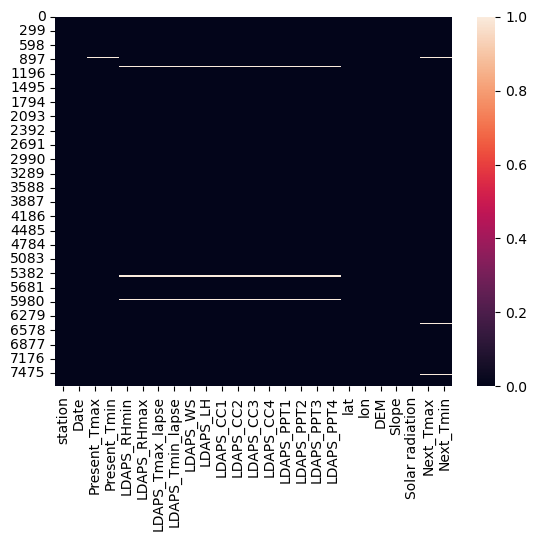

In [56]:
# Heatmap of null values
sns.heatmap(df.isnull())

### Missing Data Analysis Observation

Upon conducting an analysis of the dataset, the following observations regarding missing data have been made:

* **Station and Date:** The columns "station" and "Date" have a small number of missing values (2 each). These missing values may be attributed to data collection or recording errors. Given their limited presence, it might be reasonable to investigate and potentially correct or impute these missing values.

* **Weather-Related Attributes:** Several weather-related attributes exhibit missing values, such as "Present_Tmax," "Present_Tmin," "LDAPS_RHmin," "LDAPS_RHmax," and others. These missing values could be due to various factors, including sensor issues or data recording gaps. Care should be taken when addressing these missing values to prevent introducing bias into the analysis.

* **Target Variables:** The target variables "Next_Tmax" and "Next_Tmin" also contain missing values. It's important to consider the impact of these missing values on any predictive modeling tasks. Depending on the extent of missing data, strategies like imputation or exclusion of affected rows could be explored.

In conclusion, the dataset exhibits missing data in various columns, necessitating careful handling to ensure the quality and validity of any analyses or models derived from the data. Strategies for imputation and treatment of missing values should be applied thoughtfully and with consideration of the broader context.

### Dropping All null values

In [57]:
# Dropping All null values
df = df.dropna()

In [58]:
#checking null values after dropping
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

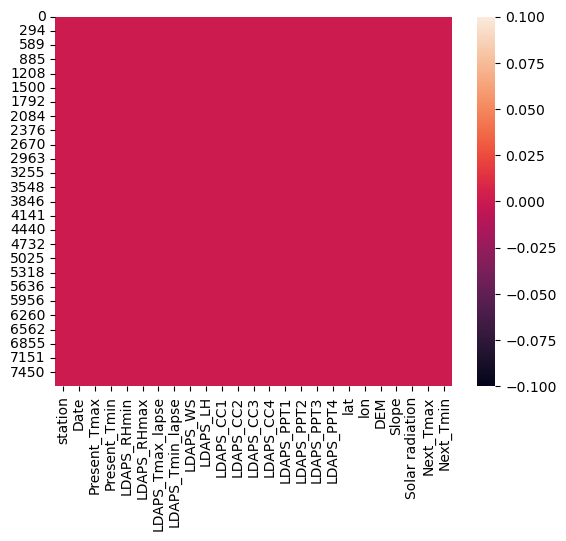

In [59]:
# Heatmap of null values
sns.heatmap(df.isnull())

Observation:

Now there is no null value in the Data

### Checking Data Loss After Removing Null Values

In [60]:
#checking shape after removing null values
df.shape

(7588, 25)

In [61]:
#Data Loss
col_before_removing_nulls=7752
col_after_removing_nulls = 7588
Data_Loss = (col_before_removing_nulls - col_after_removing_nulls) / col_before_removing_nulls * 100
print(f"there is  {Data_Loss} % dataloss after removing null values")

there is  2.1155830753353975 % dataloss after removing null values


In [62]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


### changing Datatype of datetime column for further analysis

In [63]:
df['Date'] = pd.to_datetime(df['Date'])

Here we have removed the object datatype "Date" column and separated the "Date" column into three different columns namely day - month - year with the help of pandas Datetime option.

### Statistical Data Analysis

In [64]:
#checking description
df.describe().T

count         mean         std          min          25%  \
station           7588.0    13.014101    7.217858     1.000000     7.000000   
Present_Tmax      7588.0    29.748366    2.967401    20.000000    27.800000   
Present_Tmin      7588.0    23.195809    2.400880    11.300000    21.600000   
LDAPS_RHmin       7588.0    56.724969   14.626559    19.794666    45.960243   
LDAPS_RHmax       7588.0    88.360823    7.199456    58.936283    84.203724   
LDAPS_Tmax_lapse  7588.0    29.620128    2.943496    17.624954    27.673756   
LDAPS_Tmin_lapse  7588.0    23.511786    2.342579    14.272646    22.086820   
LDAPS_WS          7588.0     7.094097    2.177034     2.882580     5.675358   
LDAPS_LH          7588.0    62.492606   33.686158   -13.603212    37.206201   
LDAPS_CC1         7588.0     0.368510    0.262260     0.000000     0.146546   
LDAPS_CC2         7588.0     0.355528    0.257922     0.000000     0.140324   
LDAPS_CC3         7588.0     0.317546    0.249833     0.000000     0.100950   
LDAPS_CC4         7588.0     0.298268    0.253392     0.000000     0.081495   
LDAPS_PPT1        7588.0     0.589008    1.927577     0.000000     0.000000   
LDAPS_PPT2        7588.0     0.480738    1.743327     0.000000     0.000000   
LDAPS_PPT3        7588.0     0.275007    1.146087     0.000000     0.000000   
LDAPS_PPT4        7588.0     0.265373    1.179661     0.000000     0.000000   
lat               7588.0    37.544792    0.050428    37.456200    37.510200   
lon               7588.0   126.991420    0.079220   126.826000   126.937000   
DEM               7588.0    61.918136   54.323529    12.370000    28.700000   
Slope             7588.0     1.259755    1.372748     0.098500     0.271300   
Solar radiation   7588.0  5343.724208  429.782561  4329.520508  5001.485717   
Next_Tmax         7588.0    30.241526    3.111807    17.400000    28.200000   
Next_Tmin         7588.0    22.910820    2.482256    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.800000    29.900000  
LDAPS_RHmin         55.023199    67.115099    98.524734  
LDAPS_RHmax         89.784122    93.742725   100.000153  
LDAPS_Tmax_lapse    29.709537    31.711109    38.542255  
LDAPS_Tmin_lapse    23.758249    25.155660    29.619342  
LDAPS_WS             6.547838     8.028960    21.857621  
LDAPS_LH            56.898324    84.235666   213.414006  
LDAPS_CC1            0.315706     0.574174     0.967277  
LDAPS_CC2            0.311676     0.557164     0.968353  
LDAPS_CC3            0.261795     0.496444     0.983789  
LDAPS_CC4            0.227459     0.498127     0.974710  
LDAPS_PPT1           0.000000     0.052594    23.701544  
LDAPS_PPT2           0.000000     0.017735    21.621661  
LDAPS_PPT3           0.000000     0.007855    15.841235  
LDAPS_PPT4           0.000000     0.000017    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178200  
Solar radiation   5441.987305  5729.485840  5992.895996  
Next_Tmax           30.400000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

### visualizing the statistical description of numeric datatype columns

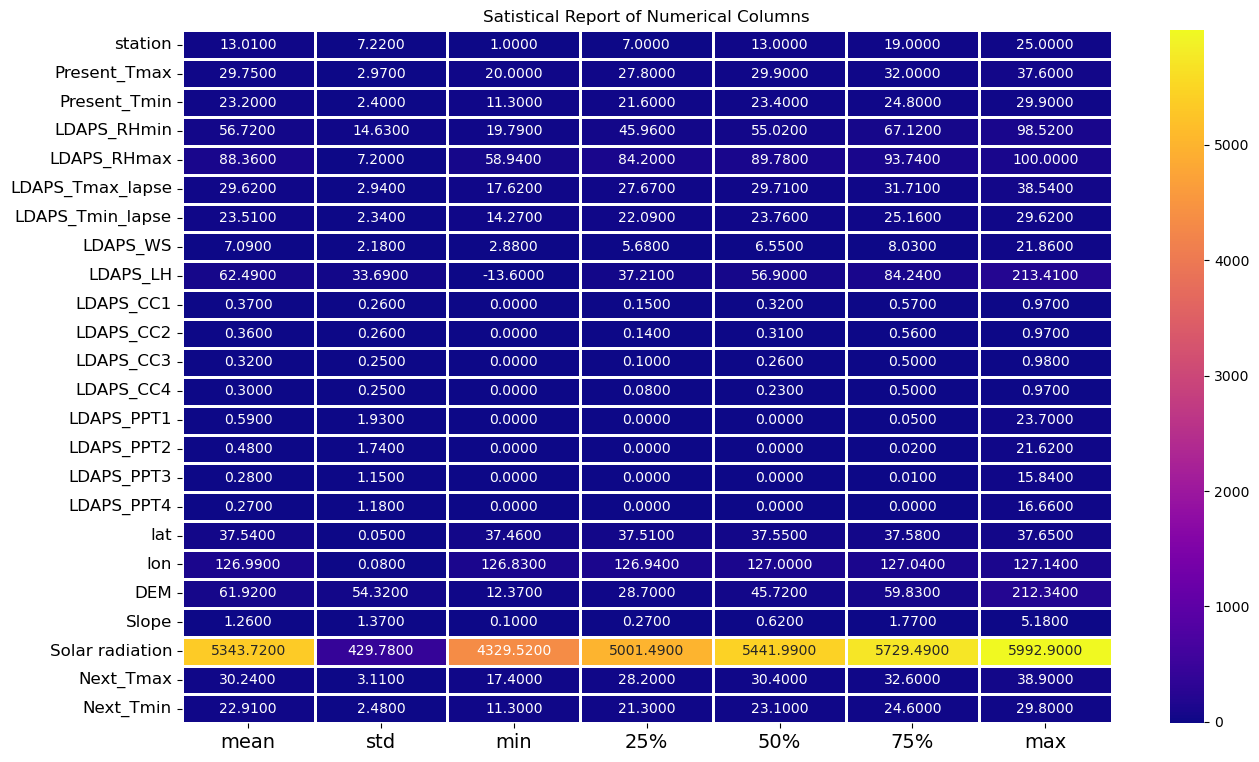

In [65]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="plasma")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

### DataFrame Description
**The following key observations can be made from the descriptive statistics of the dataset:**

### Station Distribution:

The dataset contains a total of 7588 data points.
The data seems to be recorded at 25 different weather stations (Station 1 to 25).

### Temperature:

The mean present maximum temperature (Present_Tmax) is approximately 29.75°C, with a standard deviation of about 2.97°C.
The mean present minimum temperature (Present_Tmin) is approximately 23.20°C, with a standard deviation of about 2.40°C.
The maximum present maximum temperature is 37.6°C, while the minimum is 20.0°C.
The maximum present minimum temperature is 29.9°C, while the minimum is 11.3°C.
Temperature values appear to be within a reasonable range for weather data.

### Relative Humidity:

The mean LDAPS relative humidity at the minimum (LDAPS_RHmin) is approximately 56.72%, with a standard deviation of about 14.63%.
The mean LDAPS relative humidity at the maximum (LDAPS_RHmax) is approximately 88.36%, with a standard deviation of about 7.20%.
The distribution of relative humidity values seems reasonable.

### Temperature Lapse:

The mean LDAPS temperature lapse at the maximum (LDAPS_Tmax_lapse) is approximately 29.62°C, with a standard deviation of about 2.94°C.
The mean LDAPS temperature lapse at the minimum (LDAPS_Tmin_lapse) is approximately 23.51°C, with a standard deviation of about 2.34°C.

### Wind Speed:

The mean LDAPS wind speed (LDAPS_WS) is approximately 7.09 km/h, with a standard deviation of about 2.18 km/h.

### Latent Heat:

The mean LDAPS latent heat flux (LDAPS_LH) is approximately 62.49 W/m², with a standard deviation of about 33.69 W/m².

### Cloud Cover:

The mean LDAPS first cloudbase cover (LDAPS_CC1) is approximately 0.37, with a standard deviation of about 0.26.

### Solar Radiation:

The mean solar radiation (Solar radiation) is approximately 5343.72 W/m², with a standard deviation of about 429.78 W/m².

### Terrain and Location:

The dataset covers a range of latitude (lat) from 37.4562 to 37.6450 and longitude (lon) from 126.8260 to 127.1350.
The digital elevation model (DEM) ranges from 12.37 to 212.34.
The slope of the terrain (Slope) varies from 0.0985 to 5.1782.

### Target Variables (Next Day's Temperatures):

* The mean of the next day's maximum temperature (Next_Tmax) is approximately 30.24°C, with a standard deviation of about 3.11°C.
* The mean of the next day's minimum temperature (Next_Tmin) is approximately 22.91°C, with a standard deviation of about 2.48°C.
* The maximum next day's maximum temperature is 38.9°C, while the minimum is 17.4°C.
* The maximum next day's minimum temperature is 29.8°C, while the minimum is 11.3°C.

These observations provide a basic understanding of the dataset's characteristics and distribution of key weather-related features. Further analysis and modeling can be conducted based on these insights.

In [66]:
# checking number of unique values in each column
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

### Observations: Number of Unique Values in Each Column

* Here are some important observations based on the number of unique values in each column of the dataset:

* The station column has 25 unique values, indicating the presence of data from 25 different weather stations.

* The Date column has 307 unique values, suggesting that the dataset spans observations over 307 distinct dates.

* Columns like Present_Tmax and Present_Tmin have relatively fewer unique values (167 and 155 respectively), which could indicate a range of observed temperatures.

* Columns like LDAPS_RHmin, LDAPS_RHmax, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 show a very high number of unique values, almost equal to the total number of rows in the dataset. This might indicate continuous data with minimal repetition.

* LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4 columns, which likely represent precipitation data, have varying unique values. This suggests a range of observed precipitation levels.

* The lat column has 12 unique values, possibly indicating the presence of data from 12 distinct latitudinal points.

* Similarly, the lon, DEM, Slope, and Solar radiation columns also have a consistent number of unique values (25, 25, 25, and 1575 respectively), possibly representing measurements across different geographic points.

* Next_Tmax and Next_Tmin columns have a moderate number of unique values (181 and 157 respectively), which could represent a range of predicted temperatures for the next time period.

These observations provide insights into the diversity and distribution of data within each column of the dataset.

### Checking skewness

In [67]:
#checking skewness
skewness = df.skew()
skewness

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

### Observations: Skewness of Dataset Columns

Skewness is a statistical measure that indicates the asymmetry of the probability distribution of a real-valued random variable. Here are some observations based on the skewness values of each column in the dataset:

* Features with skewness values close to 0 (around -0.5 to 0.5) indicate relatively balanced distributions, where the data is relatively symmetrical around the mean. Examples of such features include station, Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, lon, lat, and Solar radiation.

* Features with positive skewness values (greater than 0.5) indicate a right-skewed distribution, where the majority of the data is concentrated on the left side (lower values) and the tail extends to the right. Examples of such features include LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, and Slope.

* Features with negative skewness values (less than -0.5) indicate a left-skewed distribution, where the majority of the data is concentrated on the right side (higher values) and the tail extends to the left. Examples of such features include LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmin_lapse, Next_Tmax, and Next_Tmin.

* Some features, such as LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4, have relatively high positive skewness values (greater than 5). This indicates a distribution that is heavily skewed to the right, suggesting that these features may have a few very high values that are far from the majority of the data points.

Overall, understanding the skewness of each feature is important for appropriate data preprocessing and modeling, as skewed data distributions may impact the performance of certain algorithms and statistical analyses.

### Visualizing The Data

In [68]:
col = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year',
       'State', 'City']
print(col)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year', 'State', 'City']


Storing all the column names present in our dataframe in a separate list that might come in handy later on

### Next_Tmax and Next_Tmin Over Date

In [69]:
fig = px.line(df, x='Date', y=['Next_Tmax', 'Next_Tmin'], labels={'Date': 'Date', 'value': 'Temperature (°C)'}, 
              title='Next_Tmax and Next_Tmin Over Date')

fig.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')

fig.show()

In [70]:
fig = px.scatter(df, x='Date', y=['Next_Tmax', 'Next_Tmin'], labels={'Date': 'Date', 'value': 'Temperature (°C)'}, 
                 title='Scatter Plot of Next_Tmax and Next_Tmin Over Date')

fig.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')

fig.show()

**Observation:**

Looking at this graph we can say that the next dat minimum temprature was 11.3 C on 26/08/2016

Looking at this graph we can say that the next dat maximum temprature was 38.9 C on 08/10/2016

### Present_Tmax and Present_Tmin Over Date

In [71]:
fig = px.line(df, x='Date', y=['Present_Tmax', 'Present_Tmin'], labels={'Date': 'Date', 'value': 'Temperature (°C)'}, 
              title='Present_Tmax and Present_Tmin Over Date')

fig.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')

fig.show()

In [72]:
fig = px.scatter(df, x='Date', y=['Present_Tmax', 'Present_Tmin'], labels={'Date': 'Date', 'value': 'Temperature (°C)'}, 
                 title='Scatter Plot of Present_Tmax and Present_Tmin Over Date')

fig.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')

fig.show()

**Observation:**

Looking at this graph we can say that the next dat Present minimum temprature was 11.3 C on 27/08/2016

Looking at this graph we can say that the next dat maximum temprature was 37.6 C on 08/11/2016

### Plotting Histplot

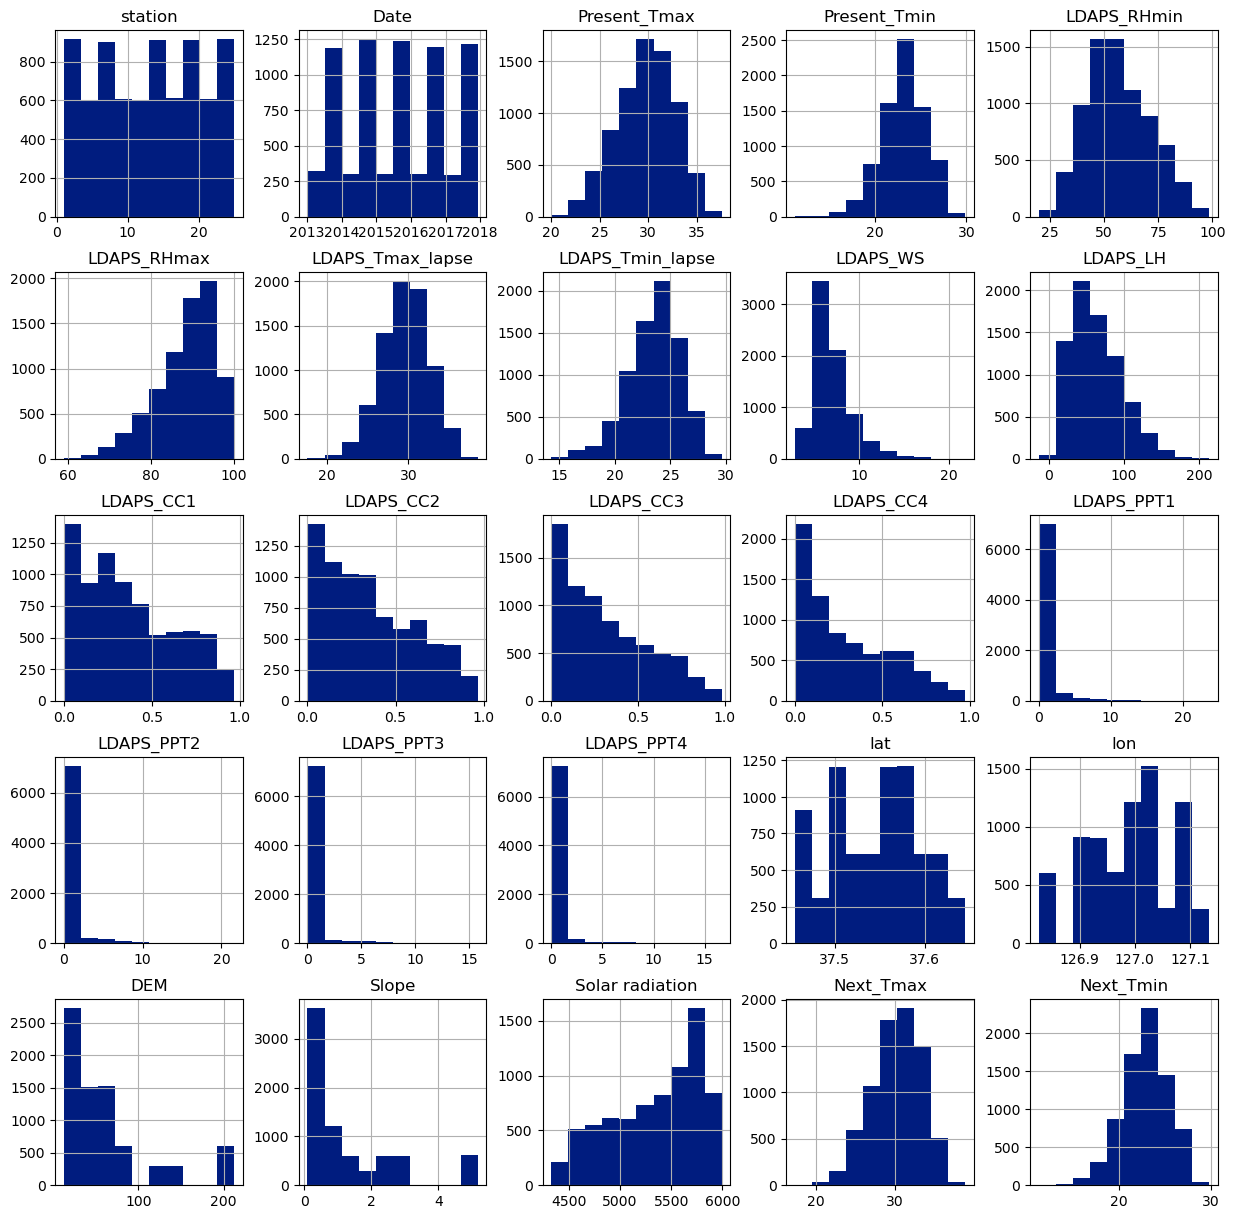

In [73]:
df.hist(figsize=(15,15));

The above histogram graph shows value count of the readings of the various variables:

* DEM around 70 % of the data show below 50.

* The occurence of the slope is maximum number of times that is below 2

* Solar radiation is raning from 5500 to 6000 having the highest number of instances.

* Present temperatue maximum is highest at 30 where the present temperature minimum is highest at around 24.

### Histplot With KDE= TRUE

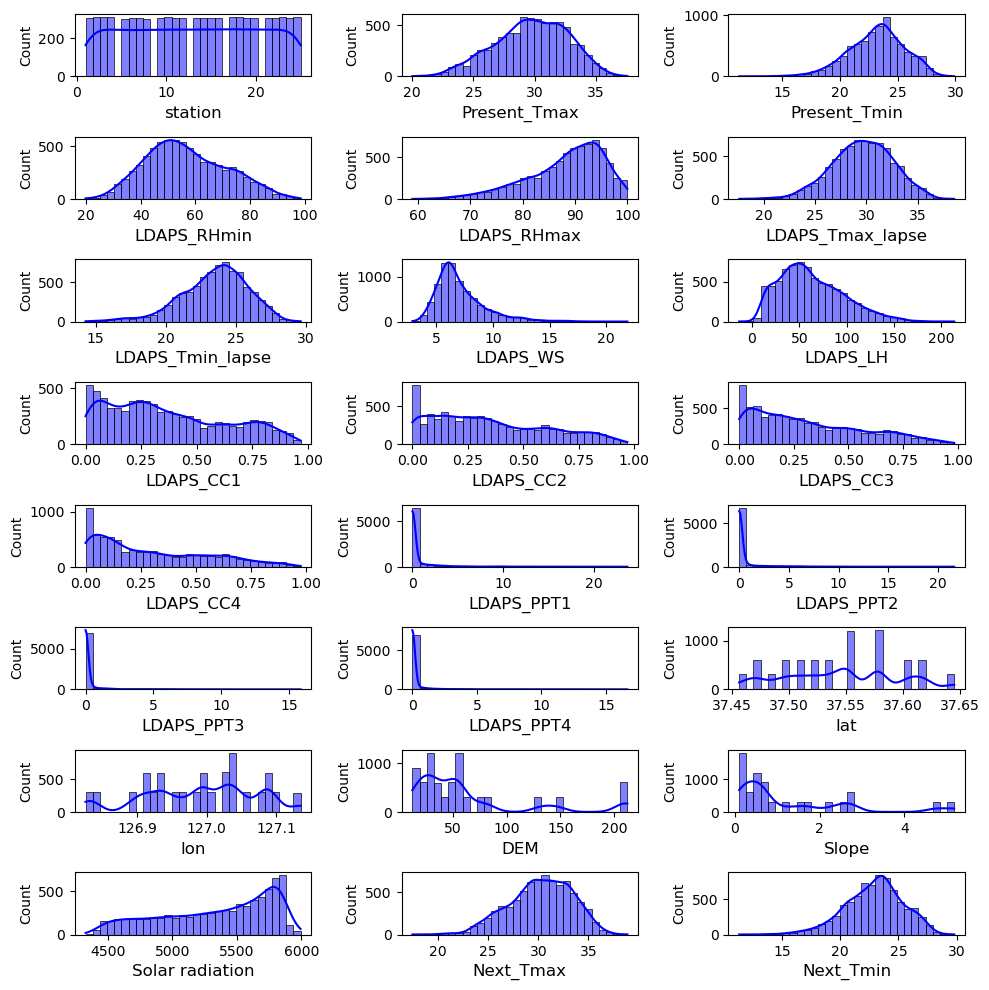

In [74]:
plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

for column in df.columns:
    if column != 'Date':
        if plotnumber <= 24:
            ax = plt.subplot(8, 3, plotnumber)
            sns.histplot(df[column], bins=30, kde=True, color='blue')
            plt.xlabel(column, fontsize=12)
        plotnumber += 1

plt.tight_layout()
plt.show()

### feature engineering

In [76]:
#creating day month year column by Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [77]:
df.drop('Date',axis=1,inplace=True)

In [78]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  day  month  year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

### Cleaning Data

### 1.Handling Outliers

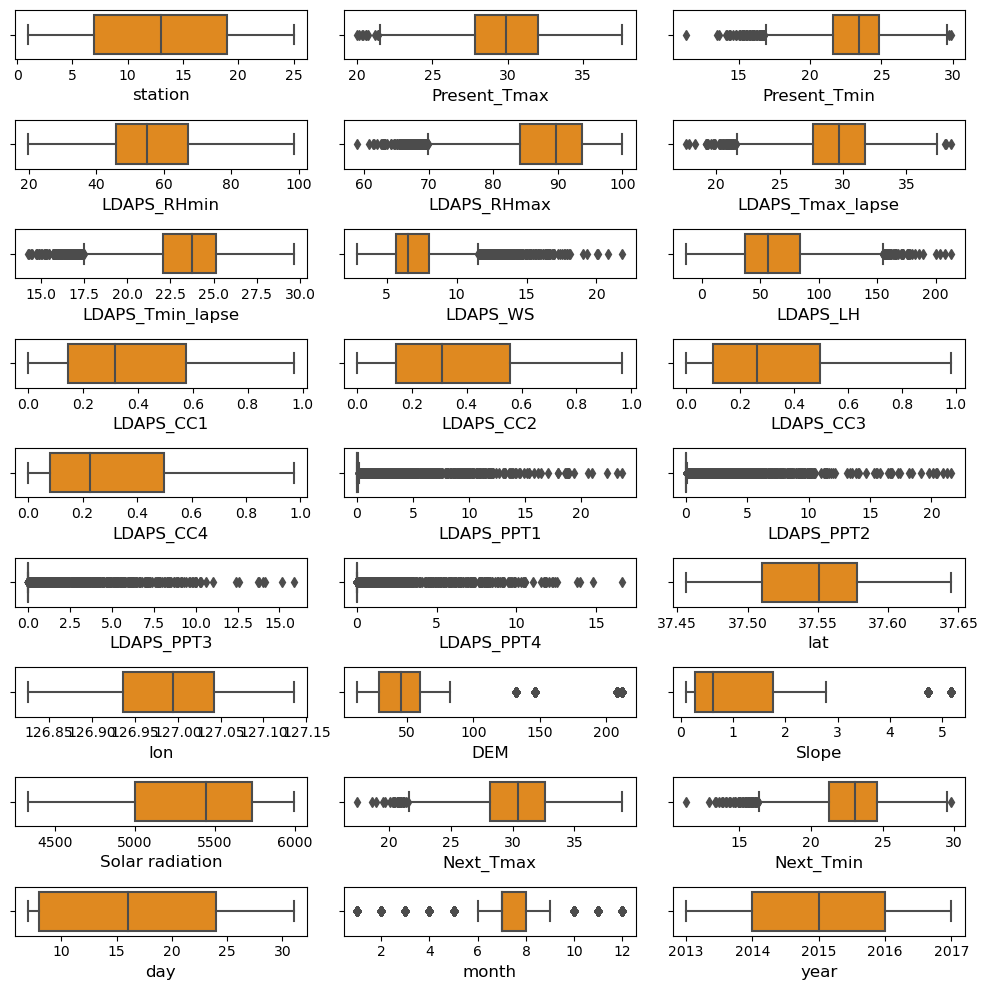

In [79]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

**Observation:**

Looking at this graph it is known that outliers are present in many columns . so we have to handle them for better result.

Outliers are Present in these columns:

[ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
  'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1',
  'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin']

In [80]:
clolumns_to_be_handle = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin']]

### Z score method for removing Outliers

In [81]:
z=np.abs(zscore(clolumns_to_be_handle))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.353318      0.748029     0.382768          0.525269   
1         0.725138      0.664721     0.311697          0.078334   
2         0.624033      0.043400     0.609425          0.160080   
3         0.758840      0.085054     1.128335          0.028710   
4         0.556630      0.539758     0.249244          0.171981   
...            ...           ...          ...               ...   
7745      2.240616      2.247578     1.402898          0.614083   
7746      2.442826      2.414195     0.648815          0.990460   
7747      2.173212      2.539157     1.318376          1.110333   
7748      2.173212      2.289232     1.537141          0.886737   
7749      2.206914      2.414195     1.544257          0.570995   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.215525  0.126423  0.206603    0.305589    0.275777   
1             0.223368  0.644133  0.313359    0.305589    0.275777   
2             0.449896  0.439100  1.244497    0.305589    0.275777   
3             0.079238  0.663353  0.096026    0.305589    0.275777   
4             0.010803  0.624327  1.349989    0.305589    0.275777   
...                ...       ...       ...         ...         ...   
7745          2.223667  0.225479  1.569844    0.305589    0.275777   
7746          2.432415  0.609132  0.583486    0.305589    0.275777   
7747          2.021883  0.434188  0.283984    0.305589    0.275777   
7748          2.039881  0.253241  0.452772    0.305589    0.275777   
7749          2.129768  0.089654  1.585402    0.305589    0.275777   

      LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  Next_Tmax  Next_Tmin  
0       0.239969    0.224971  2.769091  1.111162   0.366861   0.689265  
1       0.239969    0.224971  0.315828  0.543220   0.083068   0.165513  
2       0.239969    0.224971  0.526719  0.723891   0.275895   0.398527  
3       0.239969    0.224971  0.298272  0.928888   0.468721   0.559681  
4       0.239969    0.224971  0.494848  0.549485   0.308032   0.165513  
...          ...         ...       ...       ...        ...        ...  
7745    0.239969    0.224971  0.655747  0.500966   0.848928   2.099366  
7746    0.239969    0.224971  0.735482  0.820711   0.720377   2.341098  
7747    0.239969    0.224971  0.852919  0.804538   0.623964   1.938212  
7748    0.239969    0.224971  0.821476  0.755800   0.527550   1.656192  
7749    0.239969    0.224971  0.779341  0.720103   0.784652   2.220232  

[7588 rows x 15 columns]

In [82]:
# creating new dataframe

df= df[(z<3).all(axis=1)]
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  day  month  year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.

In [83]:
# checking the data loss
data_loss = (7588 -6739 )/7588 *100
data_loss

11.188719030047443

here i have also used IQR method for remove outliers but but in IQR method there is huge data loss thats why i am using Z score method for removing outliers



### Heat Map

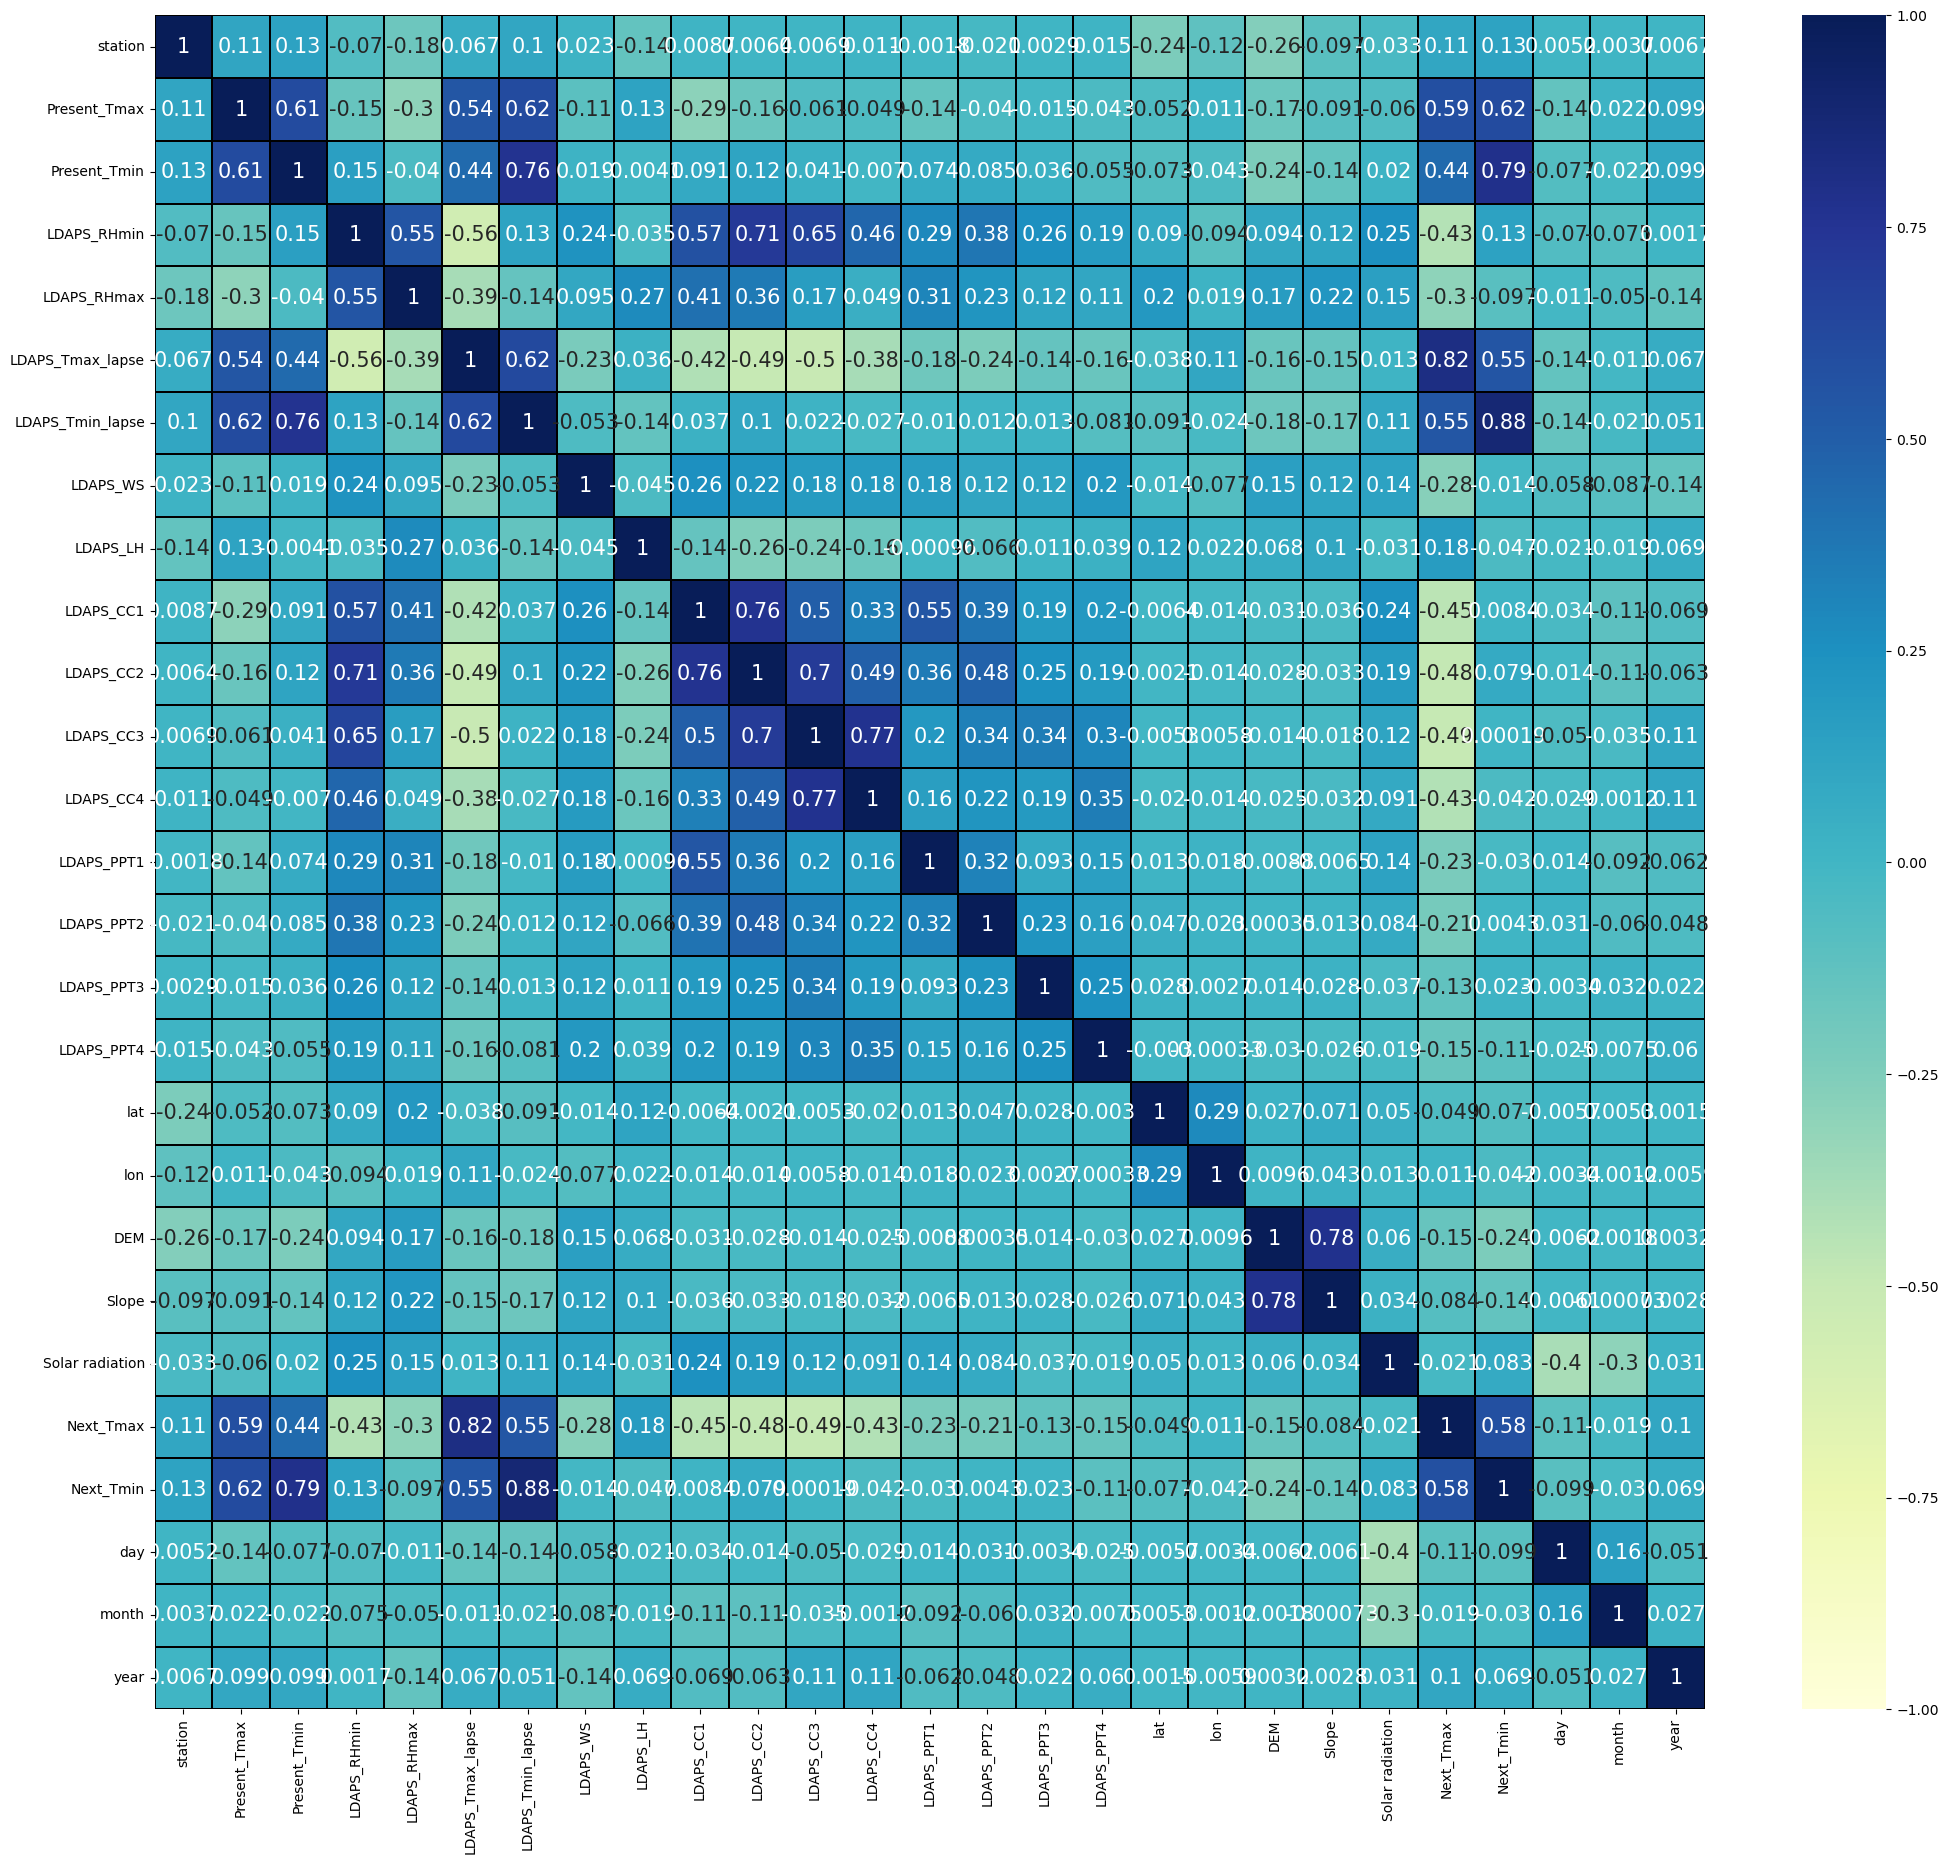

In [84]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

**Observation:**

looking at the heatmap it is known that many columns are highly correlated with each other so we will handle those too.

Here i am copying dataframe because i have to make 2 prediction in this project now i am praparing data according to Predicting "Next_Tmax"

In [85]:
df1 = df.copy()

### 2.Checking Correlation with Target Column

In [86]:
#correlation with target column
correlation_with_quality = df.corr()['Next_Tmax'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.816861
Present_Tmax        0.586943
Next_Tmin           0.580951
LDAPS_Tmin_lapse    0.546479
LDAPS_CC3           0.492707
LDAPS_CC2           0.484796
LDAPS_CC1           0.453763
Present_Tmin        0.438813
LDAPS_RHmin         0.433872
LDAPS_CC4           0.427087
LDAPS_RHmax         0.301797
LDAPS_WS            0.277823
LDAPS_PPT1          0.233124
LDAPS_PPT2          0.211431
LDAPS_LH            0.176077
LDAPS_PPT4          0.154875
DEM                 0.151929
LDAPS_PPT3          0.131137
station             0.106378
day                 0.105005
year                0.101615
Slope               0.083907
lat                 0.048616
Solar radiation     0.021477
month               0.018696
lon                 0.010567
Name: Next_Tmax, dtype: float64


here lon, month, solar, radiation, lat is vary less correlated with target columns so we will delete them

In [87]:
# dropping irrelevant columns
df.drop(columns=['lon','month','Solar radiation','lat'],axis=1,inplace=True)

### 3. Checking correlation with other features

In [88]:
#schecking correlation
df_corr = df.corr()
df_corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.176388     -0.297804     -0.039688     0.552581   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.104401      0.616886      0.764258     0.129481   
LDAPS_WS          0.023075     -0.105162      0.018711     0.236324   
LDAPS_LH         -0.135023      0.130771     -0.004055    -0.035217   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006875     -0.060549      0.041457     0.653782   
LDAPS_CC4         0.011167     -0.049339     -0.006979     0.458417   
LDAPS_PPT1       -0.001758     -0.135546      0.073741     0.289740   
LDAPS_PPT2       -0.021036     -0.040151      0.084705     0.376428   
LDAPS_PPT3        0.002851     -0.015137      0.036206     0.257765   
LDAPS_PPT4        0.015223     -0.042837     -0.055364     0.185176   
DEM              -0.257894     -0.168792     -0.241396     0.094391   
Slope            -0.096863     -0.091336     -0.138107     0.119216   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
day               0.005179     -0.136914     -0.076877    -0.070194   
year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.176388          0.066863          0.104401  0.023075   
Present_Tmax        -0.297804          0.540680          0.616886 -0.105162   
Present_Tmin        -0.039688          0.441577          0.764258  0.018711   
LDAPS_RHmin          0.552581         -0.555583          0.129481  0.236324   
LDAPS_RHmax          1.000000         -0.385695         -0.142575  0.094523   
LDAPS_Tmax_lapse    -0.385695          1.000000          0.621299 -0.229614   
LDAPS_Tmin_lapse    -0.142575          0.621299          1.000000 -0.052648   
LDAPS_WS             0.094523         -0.229614         -0.052648  1.000000   
LDAPS_LH             0.274590          0.036340         -0.135842 -0.045067   
LDAPS_CC1            0.409436         -0.416255          0.037375  0.257654   
LDAPS_CC2            0.360372         -0.492392          0.102180  0.220722   
LDAPS_CC3            0.167666         -0.500630          0.021654  0.180543   
LDAPS_CC4            0.049217         -0.384825         -0.027327  0.180312   
LDAPS_PPT1           0.308453         -0.182235         -0.010311  0.179201   
LDAPS_PPT2           0.225832         -0.237892          0.012282  0.115051   
LDAPS_PPT3           0.120010         -0.141172          0.012854  0.121172   
LDAPS_PPT4           0.106028         -0.160177         -0.081221  0.196309   
DEM                  0.172348         -0.162061         -0.177845  0.150448   
Slope                0.218465         -0.148246         -0.172382  0.118546   
Next_Tmax           -0.301797          0.816861          0.546479 -0.277823   
Next_Tmin           -0.097490          0.553227          0.875382 -0.013668   
day                 -0.011008         -0.140514         -0.143758 -0.057754   
year                -0.140290          0.066794          0.050935 -0.135636   

                  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
station          -0.135023   0.008671   0.006380   0.006875   0.011167   
Present_Tmax      0.130771  -0.290078  -0.157917  -0.060549  -0.049339   
Present_Tmin     -0.004055   0.090828   0.117894   0.041457  -0.006979   
LDAPS_RHmin      -0.035217   0.574389   0.713238   0.653782   0.458417   
LDAPS_RHmax       0.274590   0.409436   0.36037

We are writing this function to see those columns which are highly correlated with each other

In [89]:
correlation_threshold = 0.85
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [90]:
features_to_drop

{'Next_Tmin'}

Here Next_Tmin is highly correlated with other columns so I am going to delete this column

In [91]:
df.drop('Next_Tmin',axis=1, inplace=True)

### 4.VIF

In [92]:
num = df.copy()

In [93]:
num.drop('Next_Tmax',axis=1, inplace=True)

In [94]:
num.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'day',
       'year'],
      dtype='object')

In [95]:
sc=StandardScaler()
standard=sc.fit_transform(num)

In [96]:
standard=pd.DataFrame(standard, columns=num.columns)

In [97]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [98]:
VIF

features       vif
0            station  1.169634
1       Present_Tmax  2.742693
2       Present_Tmin  3.098832
3        LDAPS_RHmin  5.564567
4        LDAPS_RHmax  2.261848
5   LDAPS_Tmax_lapse  6.462409
6   LDAPS_Tmin_lapse  6.891897
7           LDAPS_WS  1.229828
8           LDAPS_LH  1.553421
9          LDAPS_CC1  3.484663
10         LDAPS_CC2  4.684820
11         LDAPS_CC3  4.915368
12         LDAPS_CC4  2.728176
13        LDAPS_PPT1  1.552538
14        LDAPS_PPT2  1.416511
15        LDAPS_PPT3  1.239166
16        LDAPS_PPT4  1.264138
17               DEM  3.084507
18             Slope  2.910119
19               day  1.107683
20              year  1.142831

All the VIF values are less than 10 so we can say that there is no multicollinearty

### 1.PREDICTING 'Next_Tmax'

### Splitting Columns into Feature and Target 

In [100]:
X= df.drop('Next_Tmax', axis=1)
Y=df['Next_Tmax']

### Checking Skewness

In [101]:
X.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
DEM                 1.764698
Slope               1.590130
day                 0.256528
year                0.025066
dtype: float64

### Removing Skewness by using Power Transformer


In [102]:
transformed=power_transform(X)

In [103]:
pd.DataFrame(transformed).skew()

0    -0.203507
1    -0.033180
2    -0.022294
3    -0.014095
4    -0.103320
5    -0.012837
6    -0.027814
7     0.007615
8    -0.030736
9     0.065308
10    0.050023
11    0.094449
12    0.142061
13    1.617538
14    1.820237
15    1.995359
16    2.267954
17    0.038830
18    0.233799
19   -0.033392
20    0.000000
dtype: float64

The skewness has been removed

### Standardization

In [104]:
sc=StandardScaler()

In [105]:
X=sc.fit_transform(transformed)

### Model Training

### Finding best Randomstate

In [106]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7879116348912419 on Random State = 84


In [107]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

### Defining All Regression Models

In [108]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

### Model Traning

In [109]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.7538569435013012
R-squared (Test): 0.7879116348912419
Mean Squared Error (MSE): 1.893911339881428
Mean Absolute Error (MAE): 1.0581407924707842
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9842025787391929
R-squared (Test): 0.9069674778606677
Mean Squared Error (MSE): 0.8307638590504441
Mean Absolute Error (MAE): 0.6858842729970321
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.8651722491827452
R-squared (Test): 0.8654309383645821
Mean Squared Error (MSE): 1.2016777615209049
Mean Absolute Error (MAE): 0.8417586195624644
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.7625987053228963
R-squared (Test): 0.7835361121393907
Mean Squared Error (MSE): 1.9329839790306376
Mean Absolute Error (MAE): 1.1230702485651345
******************************
Model: BaggingRegressor()
R-squared (Train): 0.9757286528777471
R-squared (Test): 0.8950485237

### CrossValidation

In [110]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.7879116348912419
Cross-validation R-squared: 0.6549439223349394
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.9072330185920547
Cross-validation R-squared: 0.6550573370312638
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8654388693764359
Cross-validation R-squared: 0.6857384567324809
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.775446713204359
Cross-validation R-squared: 0.6586643267123939
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.8898347732899131
Cross-validation R-squared: 0.6263269739631492
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.780942728496187
Cross-validation R-squared: 0.39004470462958374
**************************************************
Model: KNeighbo

 From Above observations we can conclude that Random Forest Regressor is best model

### Hyperparameter tuning on RandomForest Regressor

In [111]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [112]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [113]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [114]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [115]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9158787591273123

**Afetr Hyperparameter tuning Random Forest Regressor is giving 91% Acuuracy**

### Saving the Model

In [116]:
joblib.dump(grid_search.best_estimator_,"temprature_forecast_next_day_max.pkl")

['temprature_forecast_next_day_max.pkl']

### 2.Next_Tmin PREDICTION

In [117]:
df1.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  day  month  year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

### Checking Correlation with Target Column

In [118]:
#correlation with target column
correlation_with_quality = df1.corr()['Next_Tmin'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.875382
Present_Tmin        0.785946
Present_Tmax        0.615950
Next_Tmax           0.580951
LDAPS_Tmax_lapse    0.553227
DEM                 0.237683
Slope               0.136838
LDAPS_RHmin         0.134518
station             0.129110
LDAPS_PPT4          0.106821
day                 0.099202
LDAPS_RHmax         0.097490
Solar radiation     0.083207
LDAPS_CC2           0.078871
lat                 0.076705
year                0.069291
LDAPS_LH            0.046540
LDAPS_CC4           0.041994
lon                 0.041574
month               0.030289
LDAPS_PPT1          0.029752
LDAPS_PPT3          0.023274
LDAPS_WS            0.013668
LDAPS_CC1           0.008400
LDAPS_PPT2          0.004340
LDAPS_CC3           0.000194
Name: Next_Tmin, dtype: float64


In [119]:
# dropping irrelevant columns
df1.drop(columns=['LDAPS_CC3','LDAPS_PPT2','LDAPS_CC1','LDAPS_WS','LDAPS_PPT3','LDAPS_PPT1','month'],axis=1,inplace=True)

In [120]:
#Checking correlation
df1_corr = df1.corr()
df1_corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.176388     -0.297804     -0.039688     0.552581   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.104401      0.616886      0.764258     0.129481   
LDAPS_LH         -0.135023      0.130771     -0.004055    -0.035217   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC4         0.011167     -0.049339     -0.006979     0.458417   
LDAPS_PPT4        0.015223     -0.042837     -0.055364     0.185176   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.257894     -0.168792     -0.241396     0.094391   
Slope            -0.096863     -0.091336     -0.138107     0.119216   
Solar radiation  -0.032810     -0.059891      0.020030     0.251733   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
day               0.005179     -0.136914     -0.076877    -0.070194   
year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_LH  \
station             -0.176388          0.066863          0.104401 -0.135023   
Present_Tmax        -0.297804          0.540680          0.616886  0.130771   
Present_Tmin        -0.039688          0.441577          0.764258 -0.004055   
LDAPS_RHmin          0.552581         -0.555583          0.129481 -0.035217   
LDAPS_RHmax          1.000000         -0.385695         -0.142575  0.274590   
LDAPS_Tmax_lapse    -0.385695          1.000000          0.621299  0.036340   
LDAPS_Tmin_lapse    -0.142575          0.621299          1.000000 -0.135842   
LDAPS_LH             0.274590          0.036340         -0.135842  1.000000   
LDAPS_CC2            0.360372         -0.492392          0.102180 -0.257382   
LDAPS_CC4            0.049217         -0.384825         -0.027327 -0.164953   
LDAPS_PPT4           0.106028         -0.160177         -0.081221  0.038641   
lat                  0.200216         -0.038285         -0.090587  0.124764   
lon                  0.018945          0.106354         -0.024177  0.021578   
DEM                  0.172348         -0.162061         -0.177845  0.068085   
Slope                0.218465         -0.148246         -0.172382  0.100776   
Solar radiation      0.153673          0.012974          0.106033 -0.031060   
Next_Tmax           -0.301797          0.816861          0.546479  0.176077   
Next_Tmin           -0.097490          0.553227          0.875382 -0.046540   
day                 -0.011008         -0.140514         -0.143758 -0.020544   
year                -0.140290          0.066794          0.050935  0.069044   

                  LDAPS_CC2  LDAPS_CC4  LDAPS_PPT4       lat       lon  \
station            0.006380   0.011167    0.015223 -0.241811 -0.122829   
Present_Tmax      -0.157917  -0.049339   -0.042837 -0.052041  0.011132   
Present_Tmin       0.117894  -0.006979   -0.055364 -0.072707 -0.043201   
LDAPS_RHmin        0.713238   0.458417    0.185176  0.090054 -0.093969   
LDAPS_RHmax        0.360372   0.049217    0.106028  0.200216  0.018945   
LDAPS_Tmax_lapse  -0.492392  -0.384825   -0.160177 -0.038285  0.106354   
LDAPS_Tmin_lapse   0.102180  -0.027327   -0.081221 -0.090587 -0.024177   
LDAPS_LH          -0.257382  -0.164953    0.038641  0.124764  0.021578   
LDAPS_CC2          1.000000   0.490727    0.188292 -0.002066 -0.013838   
LDAPS_CC4          0.490727   1.000000    0.346915 -0.019955 -0.014148   
LDAPS_PPT4         0.188292   0.346915    1.000000 -0

We are writing this function to see those columns which are highly correlated with each other

In [121]:
correlation_threshold = 0.80
mask = df1_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [122]:
features_to_drop

{'Next_Tmax', 'Next_Tmin'}

Here 'Next_Tmax', 'Next_Tmin' are highly correlated with other columns .. Because we have to predict Next_Tmin so we will delete Next_Tmax

In [123]:
df1.drop('Next_Tmax',axis=1, inplace=True)

### VIF

In [125]:
num=df1.copy()

In [126]:
num.drop('Next_Tmin',axis=1, inplace=True)

In [127]:
num.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_LH', 'LDAPS_CC2',
       'LDAPS_CC4', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'day', 'year'],
      dtype='object')

In [128]:
sc=StandardScaler()
standard=sc.fit_transform(num)

In [129]:
standard=pd.DataFrame(standard, columns=num.columns)

In [130]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [131]:
VIF

features       vif
0            station  1.227794
1       Present_Tmax  2.374013
2       Present_Tmin  2.974134
3        LDAPS_RHmin  5.451028
4        LDAPS_RHmax  2.176156
5   LDAPS_Tmax_lapse  6.613088
6   LDAPS_Tmin_lapse  6.700579
7           LDAPS_LH  1.497476
8          LDAPS_CC2  2.771941
9          LDAPS_CC4  1.718398
10        LDAPS_PPT4  1.186897
11               lat  1.222152
12               lon  1.155341
13               DEM  3.077168
14             Slope  2.935333
15   Solar radiation  1.362906
16               day  1.247886
17              year  1.090489

### Splitting Columns into Feature and Target 

In [132]:
X= df1.drop('Next_Tmin', axis=1)
Y=df1['Next_Tmin']

### Checking Skewness

In [133]:
X.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_LH            0.567050
LDAPS_CC2           0.505774
LDAPS_CC4           0.708754
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
day                 0.256528
year                0.025066
dtype: float64

### Removing Skewness by using  Power Transformer

In [134]:
transformed=power_transform(X)

In [135]:
pd.DataFrame(transformed).skew()

0    -0.203507
1    -0.033180
2    -0.022294
3    -0.014095
4    -0.103320
5    -0.012837
6    -0.027814
7    -0.030736
8     0.050023
9     0.142061
10    2.267954
11    0.000000
12   -0.191511
13    0.038830
14    0.233799
15   -0.172156
16   -0.033392
17    0.000000
dtype: float64

### Standardization

In [136]:
sc=StandardScaler()

In [137]:
X=sc.fit_transform(transformed)

In [138]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8342291438707646 on Random State = 70


In [139]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

### Defining All Regression Models

In [140]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

### Model Training

In [141]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.8112516698352525
R-squared (Test): 0.8342291438707646
Mean Squared Error (MSE): 0.9525913233594855
Mean Absolute Error (MAE): 0.7592166133315125
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9851913752013418
R-squared (Test): 0.9001778356476241
Mean Squared Error (MSE): 0.573621502967359
Mean Absolute Error (MAE): 0.5823620178041541
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.8952754843168255
R-squared (Test): 0.8843483473011174
Mean Squared Error (MSE): 0.6645846167751723
Mean Absolute Error (MAE): 0.6280645880168988
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.8048069239829464
R-squared (Test): 0.8082900315110347
Mean Squared Error (MSE): 1.10164872673238
Mean Absolute Error (MAE): 0.8451544415166138
******************************
Model: BaggingRegressor()
R-squared (Train): 0.9773693726261815
R-squared (Test): 0.882926018153

### CrossValidation

In [142]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.8342291438707646
Cross-validation R-squared: 0.7718572860552966
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.9001536911431592
Cross-validation R-squared: 0.7838895082854783
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8842788122796046
Cross-validation R-squared: 0.7987405279975703
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.8048468156278379
Cross-validation R-squared: 0.7355021921968679
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.8853420952056719
Cross-validation R-squared: 0.7676577493109351
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.7689161736093244
Cross-validation R-squared: 0.5722730180874636
**************************************************
Model: KNeighb

**From the above pobservations we can conclude that Random Forest Regressor is best model with 90% accuracy.**

### Hyperparameter tuning on RandomForest Regressor

In [143]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [144]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [145]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [146]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [147]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9084247385801698

### Saving the Model

In [148]:
joblib.dump(grid_search.best_estimator_,"temprature_forecast_next_day_min.pkl")

['temprature_forecast_next_day_min.pkl']

# END OF THE PROJECT